<a href="https://colab.research.google.com/github/Uz8351/MyPhython/blob/master/Copia_Aula_B88_REPASO_BATCH_0CT_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Theta óptimo: [[4.1424076 ]
 [3.03922626]]


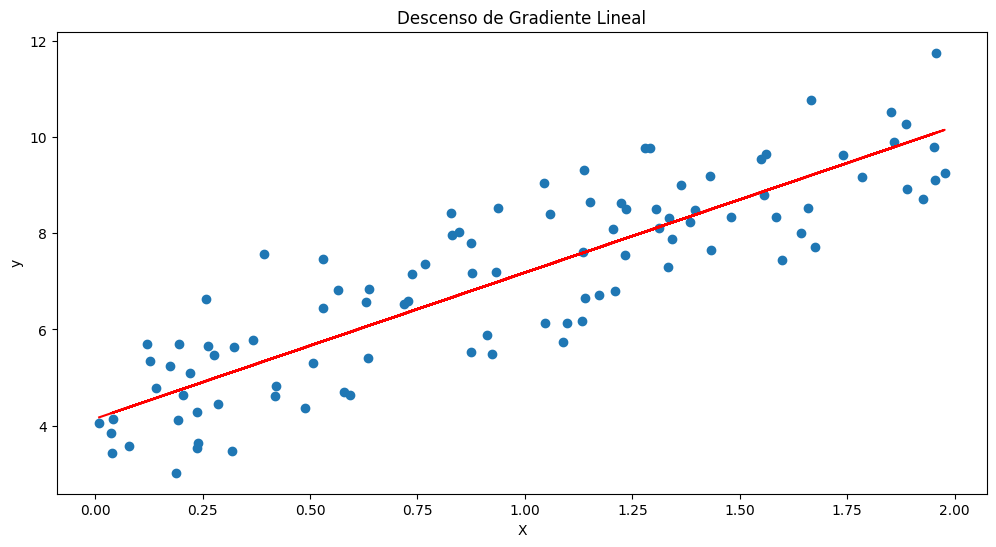

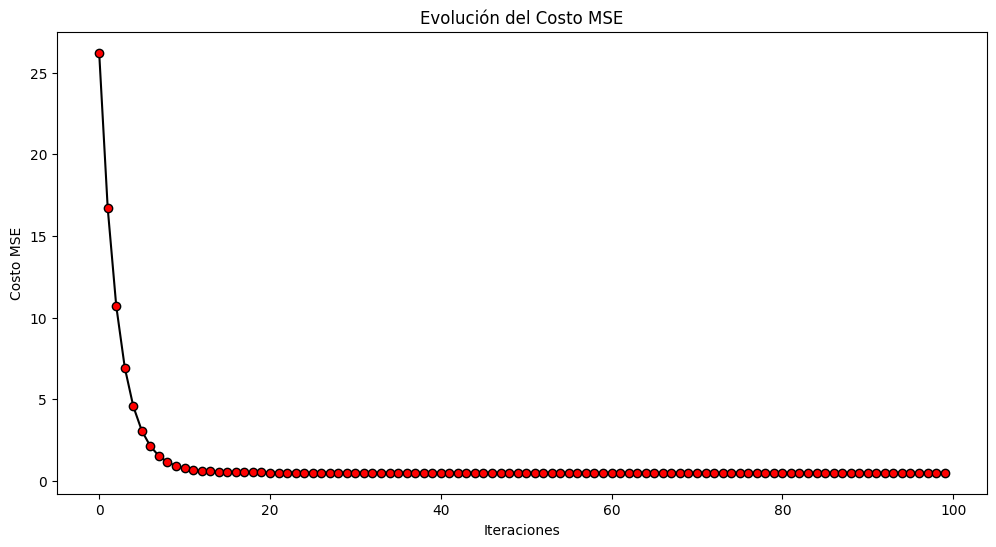

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generar datos de ejemplo
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Función para calcular el costo MSE
def calcular_costo(theta, X, y):
    m = len(y)
    predictions = X.dot(theta)
    costo = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return costo

# Gradiente descendente tipo Batch
def descenso_gradiente_batch(X, y, theta, tasa_aprendizaje, iteraciones):
    m = len(y)
    costos = []
    for _ in range(iteraciones):
        gradientes = (1 / m) * X.T.dot(X.dot(theta) - y)
        theta -= tasa_aprendizaje * gradientes
        costo = calcular_costo(theta, X, y)
        costos.append(costo)
    return theta, costos

# Agregar una columna de unos a X para el término de sesgo (bias)
X_b = np.c_[np.ones((X.shape[0], 1)), X]

# Inicializar theta aleatoriamente
theta_inicial = np.random.randn(2, 1)

# Definir la tasa de aprendizaje y el número de iteraciones
tasa_aprendizaje = 0.1
iteraciones = 100

# Ejecutar el descenso de gradiente
theta_optimo, costos = descenso_gradiente_batch(X_b, y, theta_inicial, tasa_aprendizaje, iteraciones)

# Imprimir el valor óptimo de theta
print("Theta óptimo:", theta_optimo)

# Graficar los datos y la línea de regresión
plt.figure(figsize=(12,6))
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Descenso de Gradiente Lineal")
plt.plot(X, X_b.dot(theta_optimo), color='red')
plt.show()

# Graficar la función de costo MSE
plt.figure(figsize=(12,6))
plt.plot(range(iteraciones), costos, color='black', marker='o',markerfacecolor='red')
plt.xlabel("Iteraciones")
plt.ylabel("Costo MSE")
plt.title("Evolución del Costo MSE")
plt.show()
